In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc,roc_auc_score
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
import numpy as np

In [2]:
import pandas as pd
df = pd.read_csv('../data/diabetes.csv') # 당뇨병 데이터 셋  
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [3]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


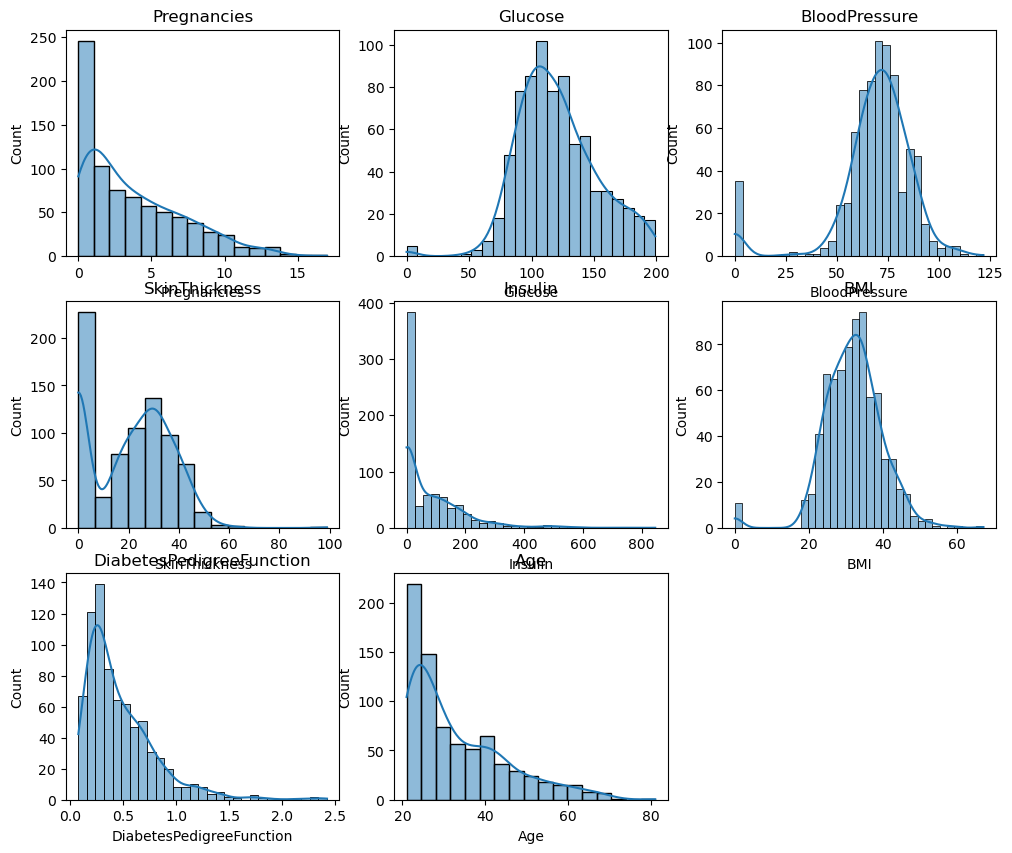

In [4]:
# 1. 탐색적 데이터 분석(EDA)
# 1-A) 각 특성의 분포 시각화
plt.figure(figsize=(12, 10))
for i, feature in enumerate(df.columns[:-1]): # 마지막 열인 'Outcome'을 제외하고 시각화
    plt.subplot(3, 3, i + 1)
    sns.histplot(df[feature], kde=True)
    plt.title(feature)    
plt.show()

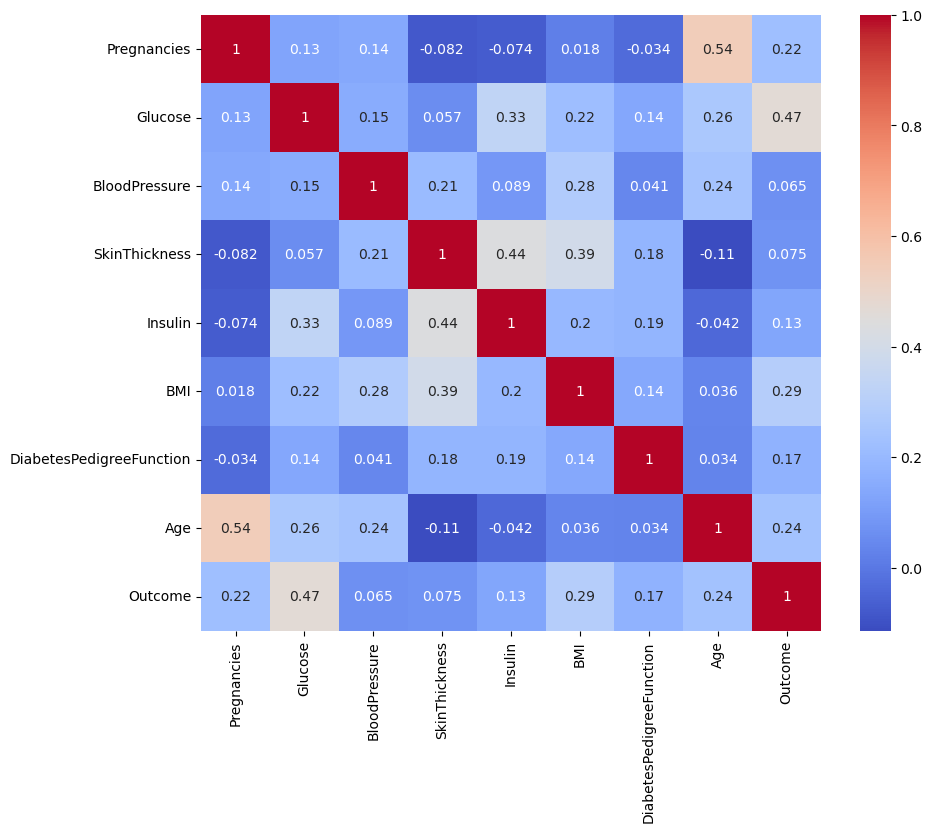

In [5]:
# 1-B) 특성 간의 상관관계 계산 및 히트맵 시각화
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.show()

In [6]:
# 2. 데이터 전처리 및 정제
# 2-1) BMI, 혈압, 글루코스 수치가 0인 데이터 처리
df['BMI'] = df['BMI'].replace(0, df['BMI'].median())
df['BloodPressure'] = df['BloodPressure'].replace(0, df['BloodPressure'].median())
df['Glucose'] = df['Glucose'].replace(0, df['Glucose'].median())
df['Glucose']

0      148
1       85
2      183
3       89
4      137
      ... 
763    101
764    122
765    121
766    126
767     93
Name: Glucose, Length: 768, dtype: int64

In [7]:
# 2-2) 수치형 변수 표준화
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df.drop('Outcome', axis=1))
df_scaled = pd.DataFrame(scaled_features, columns=df.columns[:-1])
df_scaled

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.639947,0.866045,-0.031990,0.907270,-0.692891,0.167240,0.468492,1.425995
1,-0.844885,-1.205066,-0.528319,0.530902,-0.692891,-0.851551,-0.365061,-0.190672
2,1.233880,2.016662,-0.693761,-1.288212,-0.692891,-1.331838,0.604397,-0.105584
3,-0.844885,-1.073567,-0.528319,0.154533,0.123302,-0.633239,-0.920763,-1.041549
4,-1.141852,0.504422,-2.679076,0.907270,0.765836,1.549885,5.484909,-0.020496
...,...,...,...,...,...,...,...,...
763,1.827813,-0.679069,0.298896,1.722735,0.870031,0.065361,-0.908682,2.532136
764,-0.547919,0.011301,-0.197433,0.405445,-0.692891,0.632973,-0.398282,-0.531023
765,0.342981,-0.021574,-0.031990,0.154533,0.279594,-0.909768,-0.685193,-0.275760
766,-0.844885,0.142800,-1.024647,-1.288212,-0.692891,-0.342155,-0.371101,1.170732


In [8]:
# 3. 로지스틱 회귀 모델 학습 및 평가
X = df_scaled
y = df['Outcome']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [9]:
# 3-1) 모델 학습 및 예측
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
y_pred = log_reg.predict(X_test)

In [10]:
# 3-2) 모델 성능 평가
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, log_reg.predict_proba(X_test)[:, 1])
print("Logistic Regression Performance:")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("ROC AUC Score:", roc_auc)

Logistic Regression Performance:
Accuracy: 0.7727272727272727
Precision: 0.6923076923076923
Recall: 0.6545454545454545
F1 Score: 0.6728971962616823
ROC AUC Score: 0.8189164370982553


In [11]:
# 4. K-최근접 이웃(KNN) 모델 최적화 실습
# 4-1) 모델 학습 및 예측
k_values = range(1, 15)
k_scores = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=10, scoring='accuracy')
    k_scores.append(scores.mean())

best_k = k_values[k_scores.index(max(k_scores))]
print("Best k value:", best_k)


Best k value: 13


In [12]:
# 4-2) 최적화된 모델 성능 평가
knn_best = KNeighborsClassifier(n_neighbors=best_k)
knn_best.fit(X_train, y_train)
y_pred_knn = knn_best.predict(X_test)
accuracy_knn = accuracy_score(y_test, y_pred_knn)

print("KNN , best k:")
print("Accuracy:", accuracy_knn)

KNN , best k:
Accuracy: 0.7207792207792207


In [38]:
#5. 최적의 파라미터를 추출해보자
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

data = df.iloc[:,:-1]
target = df.iloc[:,-1]

k_values = range(1,15)
param_grid = {'n_neighbors':k_values}
clf_df = GridSearchCV(KNeighborsClassifier() , param_grid , cv=10,scoring = 'accuracy')
clf_df.fit(X_train,y_train)

display(clf_df.best_score_)
display(clf_df.best_params_['n_neighbors'])

0.770386039132734

13

In [44]:
data = df.iloc[:,:-1]
target = df.iloc[:,-1]

k_values = range(1,30)
param_grid = {'n_neighbors':k_values,
             'weights':['uniform','distance'], #이웃의 가중치 결정 [가중치를 통일 , 가까운 이웃이 더 높은 가중치]
              'metric':['euclidean','manhattan','minkowski'] #이웃간 거리측정
             }
clf_df = GridSearchCV(KNeighborsClassifier() , param_grid , cv=10,scoring = 'accuracy')
clf_df.fit(X_train,y_train)

display(clf_df.best_score_)
display(clf_df.best_params_)

0.786620835536753

{'metric': 'euclidean', 'n_neighbors': 23, 'weights': 'uniform'}

In [45]:
#6-1 교차 검증 결과 상세 보기 cv_results_
import pandas as pd

cv_res = pd.DataFrame(clf_df.cv_results_)
cv_res

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_metric,param_n_neighbors,param_weights,params,split0_test_score,split1_test_score,...,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.002932,0.000554,0.005867,0.000880,euclidean,1,uniform,"{'metric': 'euclidean', 'n_neighbors': 1, 'wei...",0.629032,0.677419,...,0.645161,0.704918,0.655738,0.737705,0.754098,0.754098,0.786885,0.711925,0.054262,164
1,0.002192,0.000410,0.002594,0.000470,euclidean,1,distance,"{'metric': 'euclidean', 'n_neighbors': 1, 'wei...",0.629032,0.677419,...,0.645161,0.704918,0.655738,0.737705,0.754098,0.754098,0.786885,0.711925,0.054262,164
2,0.002199,0.000400,0.006349,0.001056,euclidean,2,uniform,"{'metric': 'euclidean', 'n_neighbors': 2, 'wei...",0.645161,0.677419,...,0.709677,0.688525,0.655738,0.770492,0.754098,0.786885,0.770492,0.721655,0.049797,161
3,0.002504,0.000671,0.002800,0.000733,euclidean,2,distance,"{'metric': 'euclidean', 'n_neighbors': 2, 'wei...",0.629032,0.677419,...,0.645161,0.704918,0.655738,0.737705,0.754098,0.754098,0.786885,0.711925,0.054262,164
4,0.002306,0.000464,0.005994,0.000456,euclidean,3,uniform,"{'metric': 'euclidean', 'n_neighbors': 3, 'wei...",0.661290,0.758065,...,0.677419,0.737705,0.688525,0.786885,0.704918,0.737705,0.754098,0.731306,0.045151,155
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
169,0.002109,0.000301,0.002943,0.000555,minkowski,27,distance,"{'metric': 'minkowski', 'n_neighbors': 27, 'we...",0.693548,0.693548,...,0.774194,0.786885,0.786885,0.737705,0.819672,0.770492,0.786885,0.767240,0.043315,45
170,0.002215,0.000382,0.006180,0.000613,minkowski,28,uniform,"{'metric': 'minkowski', 'n_neighbors': 28, 'we...",0.693548,0.725806,...,0.758065,0.770492,0.786885,0.737705,0.786885,0.786885,0.754098,0.765521,0.041339,56
171,0.002217,0.000611,0.003192,0.000376,minkowski,28,distance,"{'metric': 'minkowski', 'n_neighbors': 28, 'we...",0.693548,0.709677,...,0.790323,0.786885,0.737705,0.737705,0.803279,0.770492,0.786885,0.768747,0.048826,43
172,0.002502,0.000503,0.006502,0.000665,minkowski,29,uniform,"{'metric': 'minkowski', 'n_neighbors': 29, 'we...",0.677419,0.725806,...,0.774194,0.770492,0.770492,0.721311,0.803279,0.786885,0.754098,0.765494,0.049548,58


In [46]:
clf_df.cv_results_['params'][clf_df.best_index_]

{'metric': 'euclidean', 'n_neighbors': 23, 'weights': 'uniform'}